Difference from neid_fiesta_daily.ipynb:
Weightd average in the uncertainties 

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *
from NEID_solar_functions import *
from functions import *
#----------------------------------
# Read data
#----------------------------------


In [2]:
if 1:
    v_grid  = np.loadtxt('../lib/data_v4/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_v4/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_v4/σCCF.txt')
    bjd     = np.loadtxt('../lib/data_v4/bjd.txt')
    rv      = np.loadtxt('../lib/data_v4/rv.txt')
    σrv     = np.loadtxt('../lib/data_v4/σrv.txt')
    idx_rej = np.array(np.loadtxt('../lib/data_v4/idx_rej'), dtype=bool)
    
    # idx_v = (v_grid>90.25) & (v_grid<107.5)
    # v_grid = v_grid[idx_v]
    
    CCF = CCF[:,~idx_rej]
    σCCF = σCCF[:,~idx_rej]
    # CCF = CCF[idx_v,:]
    # σCCF = σCCF[idx_v,:]    
    bjd = bjd[~idx_rej]
    rv = rv[~idx_rej]
    σrv = σrv[~idx_rej]

In [3]:
max(v_grid), min(v_grid)

(110.75, 87.25)

In [4]:
if 0:
    v_grid  = np.loadtxt('../lib/data_526_625/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_526_625/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_526_625/σ_CCF.txt')
    bjd     = np.loadtxt('../lib/data_526_625/bjd.txt')
    rv      = np.loadtxt('../lib/data_526_625/rv.txt')
    σrv     = np.loadtxt('../lib/data_526_625/σrv.txt')

    idx_t = (bjd<2459392) & (bjd>2459361)

    CCF = CCF[idx_v,idx_t]
    σCCF = σCCF[idx_v,idx_t]
    bjd = bjd[idx_t]
    rv = rv[idx_t]
    σrv = σrv[idx_t]


In [5]:
σCCF.shape, CCF.shape, v_grid.shape

((95, 31145), (95, 31145), (95,))

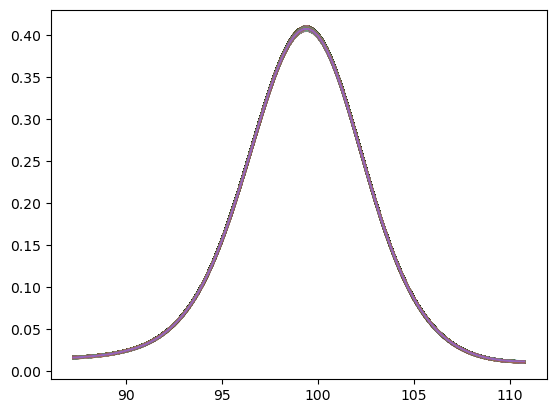

In [6]:
plt.plot(v_grid, CCF)
plt.show()

<ErrorbarContainer object of 3 artists>

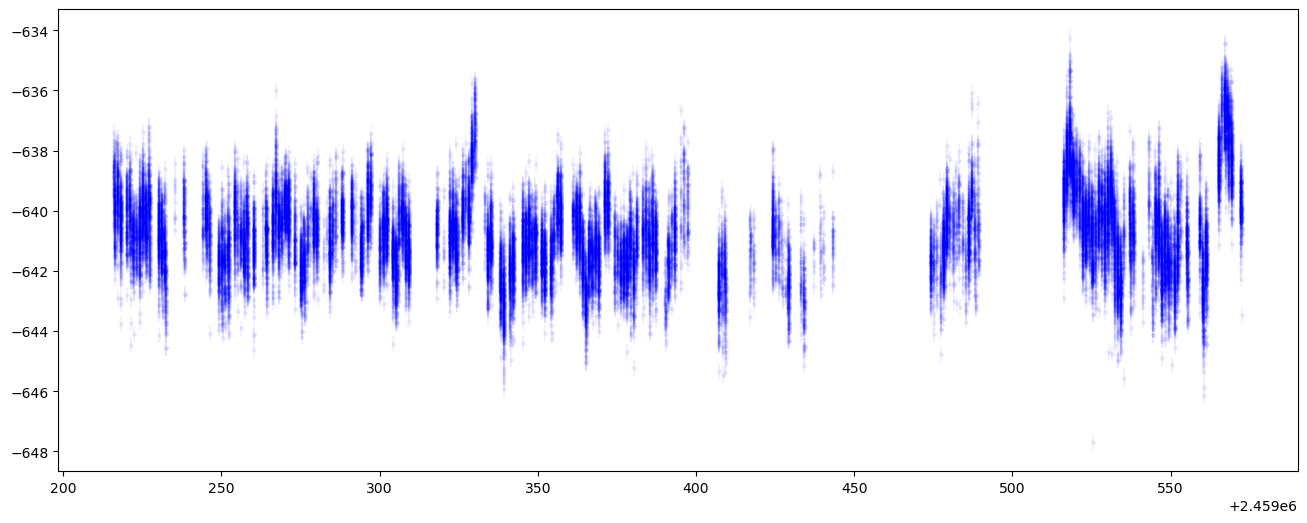

In [7]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd, rv, σrv, marker='.', ms=5, color='blue', ls='none', alpha=0.05)

## FIESTA on CCF analysis

In [8]:
k_max = 55
df, RV_FT_k, eRV_FT_k, A_k, eA_k, RV_gauss = FIESTA(v_grid, CCF, σCCF, k_max=k_max)

RV_FT_k  *= 1000
eRV_FT_k *= 1000
RV_gauss *= 1000
ΔRV_k     = RV_FT_k - RV_gauss



Velocity grid used [87.25, 110.75]

ξ_normal = 0.67


The median SNR of all CCFs is 6001
ξ_modelling_noise = 1.26


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 0.13

In summary, the cut-off frequency for FIESTA is recommended to be 0.13 (3 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000         13387.4      27.6       0.0          0.13662   
1   0.042          8504.9      10.3       3.5          0.04870   
2   0.084          3146.2       4.0       2.5          0.01186   
3   0.126           773.2       2.2       1.6          0.00243   
4   0.168           158.0       1.3       1.2          0.00055   
5   0.211            11.9       1.0      19.1          0.00052   
6   0.253            16.4       0.9       0.9          0.00045   
7   0.295            11.2       0.9       0.8          0.00042   
8   0.337            10.1       0.8       0.8          0.00039   
9   0.379             8.8       0.7       0.7        

## Plots 

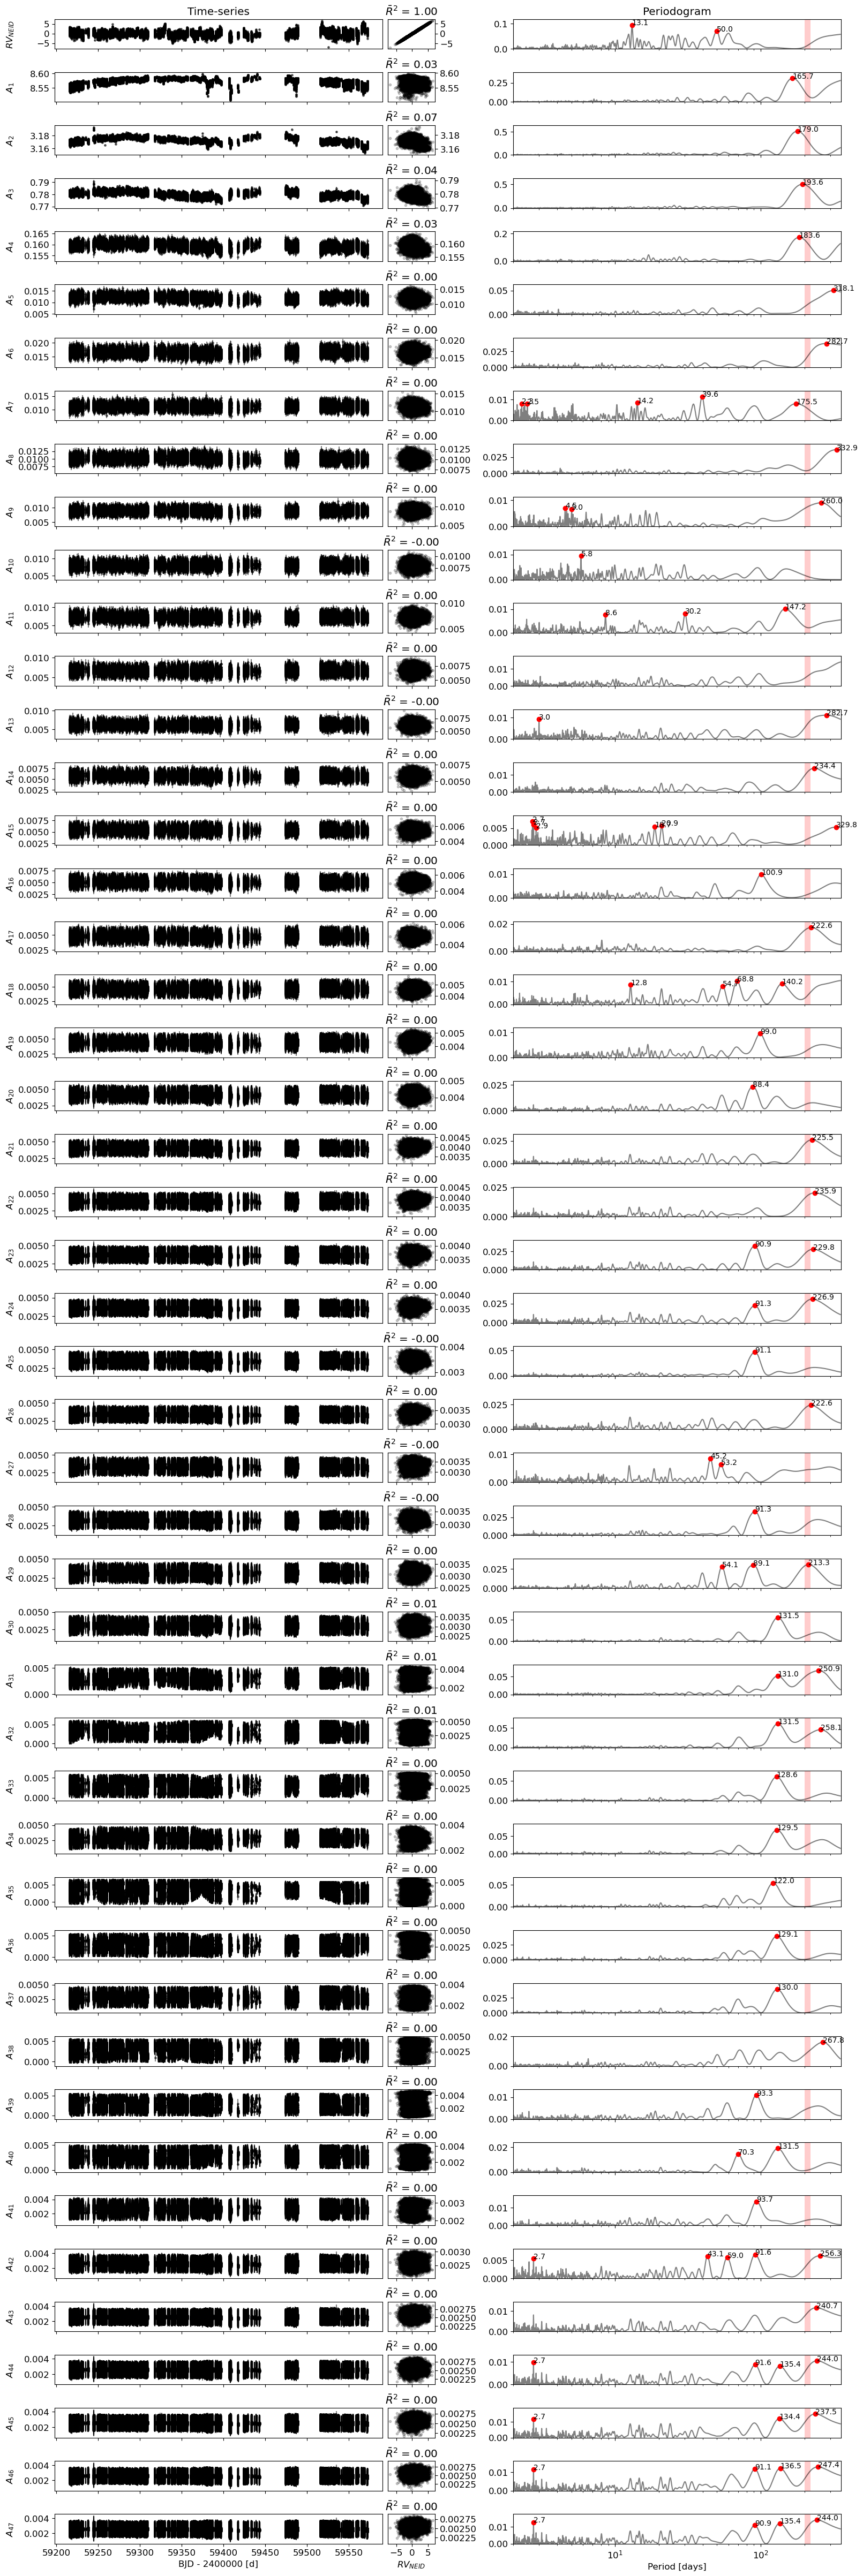

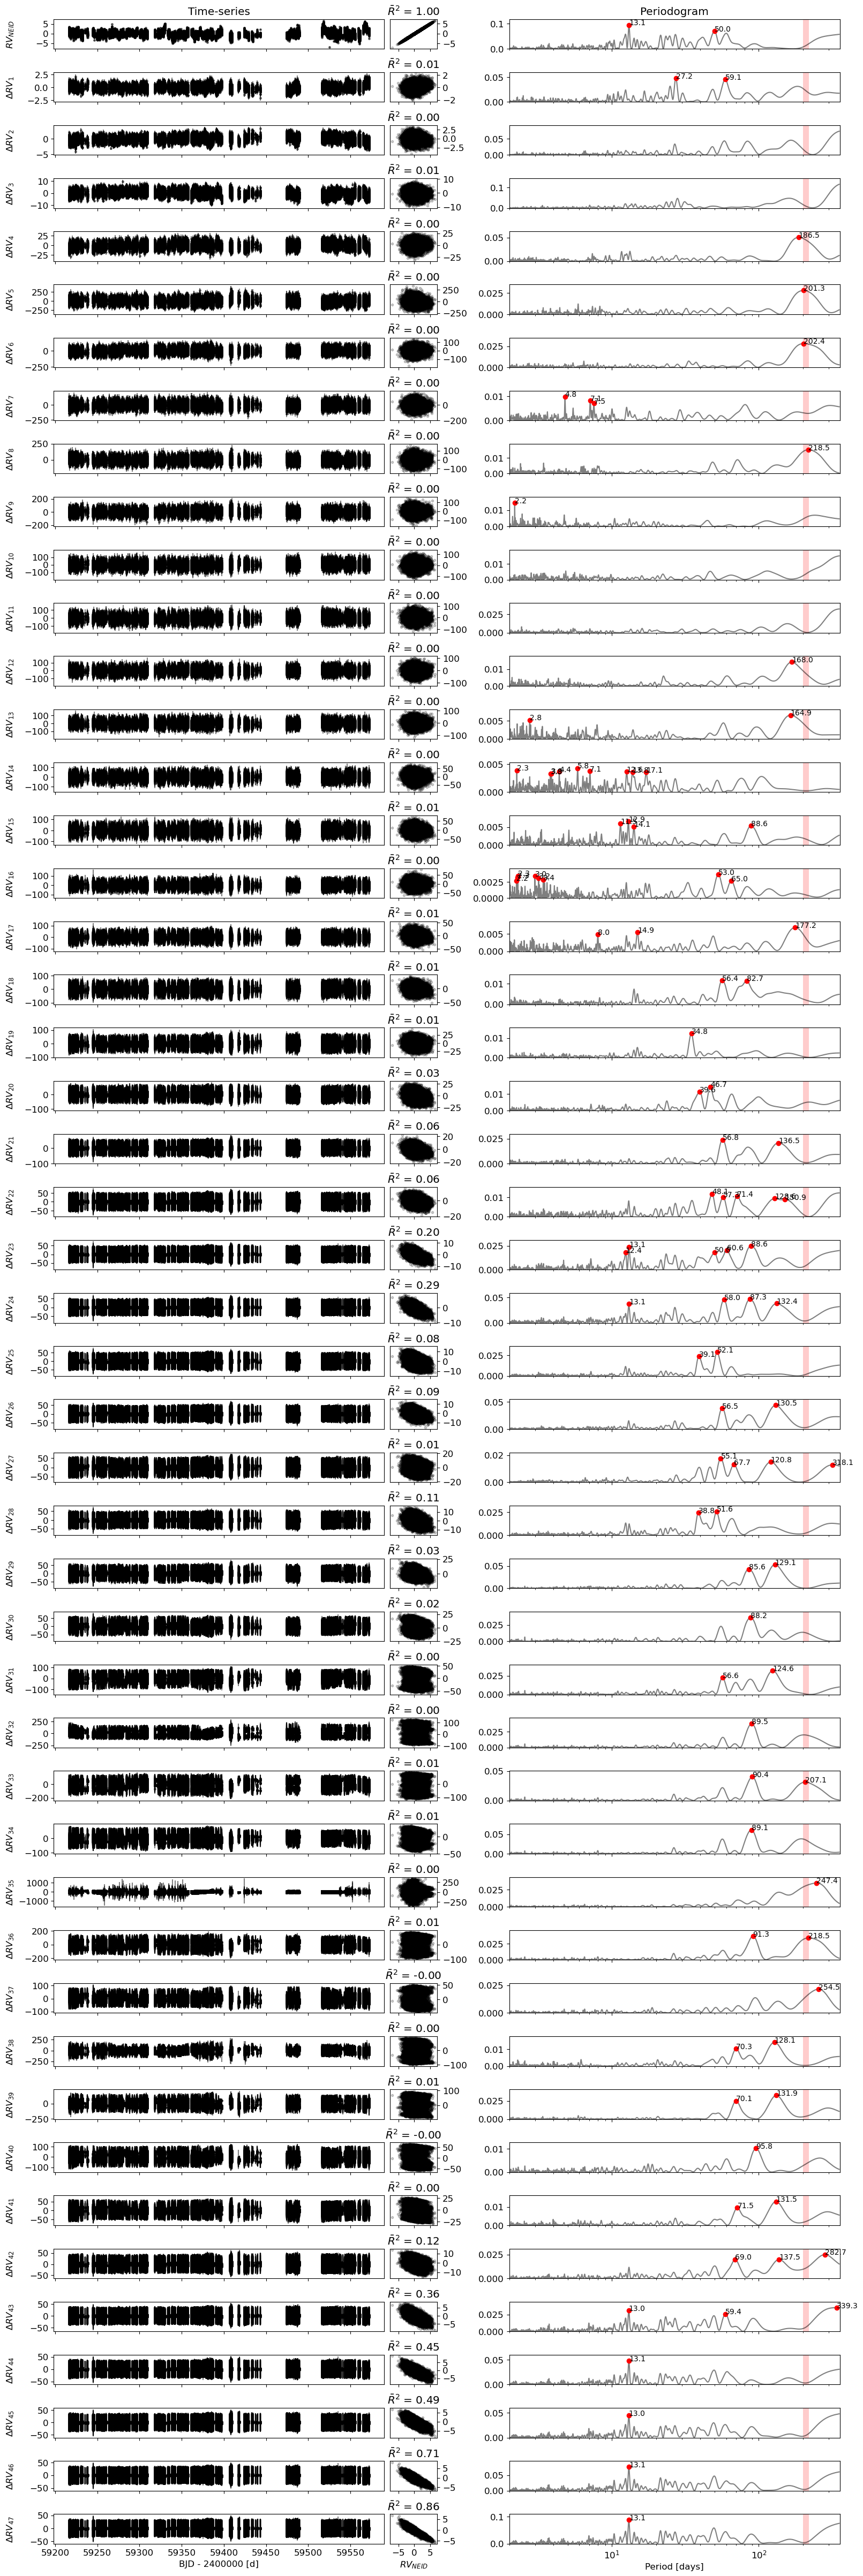

In [9]:
k_max = A_k.shape[0]

plot_all(k_mode=k_max, t=bjd-2400000, rv=rv, erv=σrv, 
    ind=A_k, eind=eA_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='')
plt.show()

plot_all(k_mode=k_max, t=bjd-2400000, rv=rv, erv=σrv, 
    ind=ΔRV_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='')
plt.show()

# PCA

In [10]:
k_max = 47
PC, weighted_pca_score, err_weighted_pca_score, n_pca = weighted_pca(X=ΔRV_k[:k_max,:].T, X_err=eRV_FT_k[:k_max,:].T, nor=False)

Cumulative variance explained vs PCA components
1 	 39.808
2 	 59.750
3 	 73.831
4 	 79.353
5 	 84.070
6 	 87.863
7 	 91.284
8 	 94.369
9 	 97.054
10 	 99.367
11 	 101.233
12 	 102.638
13 	 103.968
14 	 104.907
15 	 105.778
16 	 106.333
17 	 106.815
18 	 107.103
19 	 107.362
20 	 107.592
21 	 107.746
22 	 107.890
23 	 108.000
24 	 108.066
25 	 108.122
26 	 108.157
27 	 108.185
28 	 108.206
29 	 108.226
30 	 108.243
31 	 108.256
32 	 108.266
33 	 108.277
34 	 108.284
35 	 108.291
36 	 108.296
37 	 108.299
38 	 108.302
39 	 108.304
40 	 108.305
41 	 108.306
42 	 108.306
43 	 108.306
44 	 108.275
45 	 106.979
46 	 105.184
47 	 100.000
7 pca scores account for 91.28% variance explained
Standard deviations of each component and the midean uncertainty are
 [118.6  86.5  66.6  41.6  38.4  34.5  32.7] 
 [47.8 48.4 63.4 47.9 45.6 45.6 44.3]


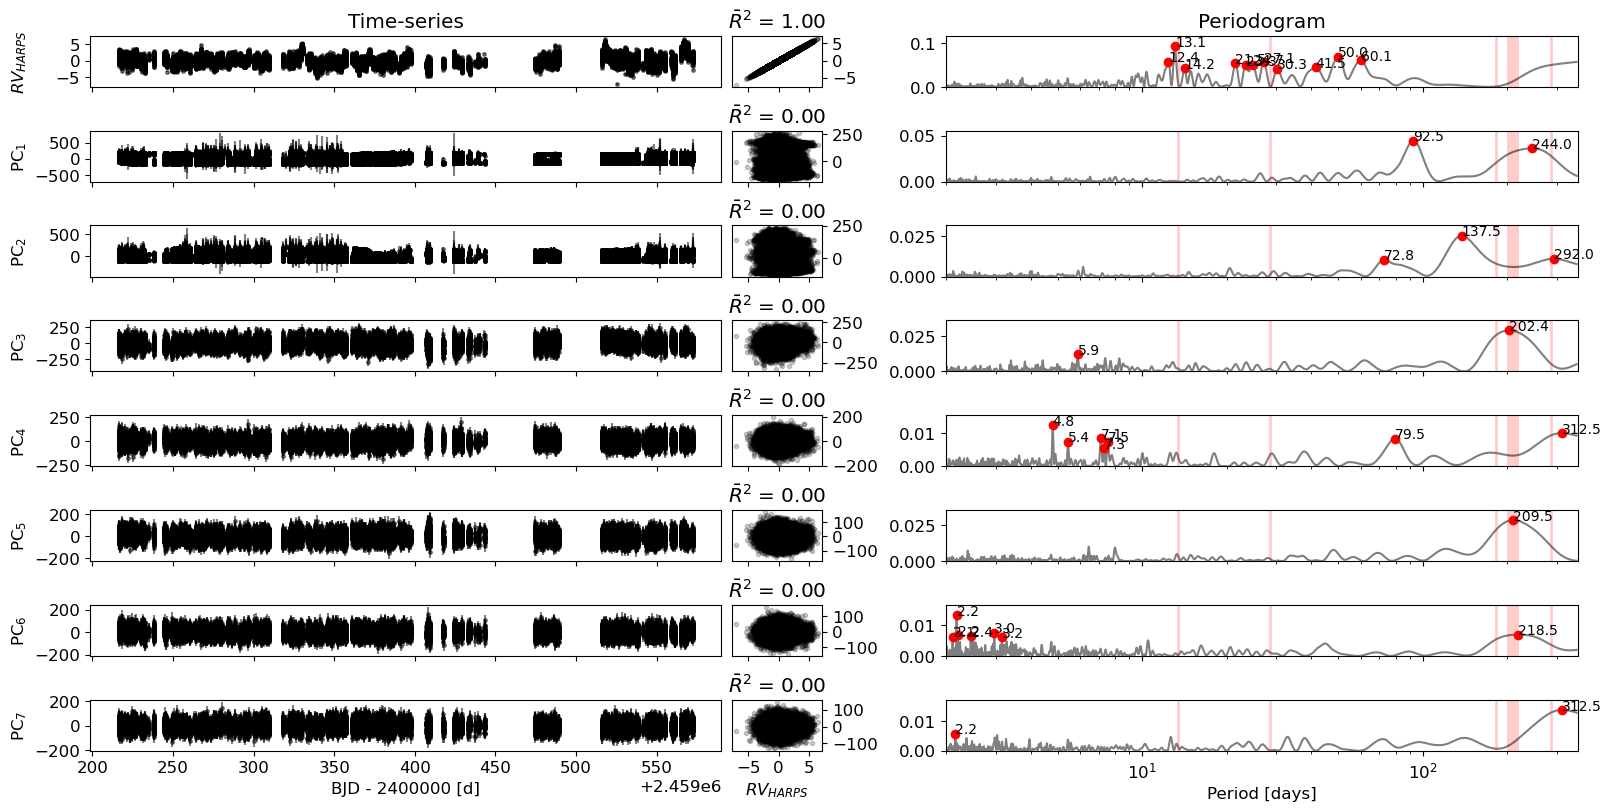

In [12]:
plot_all(k_mode=7, t=bjd, rv=rv, erv=σrv, 
    vlines = [13.4, 28.5, 365/2, 285, 400],
    ind=weighted_pca_score.T, eind=err_weighted_pca_score.T, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{HARPS}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='PC',
    height_ratio=0.4,
    file_name='')

# MLP

In [13]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

# print(tf.VERSION)
print(tf.keras.__version__)

2.10.0


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# def model_MLP(X, Y, lr_model, batch_size=64, epochs=200, learning_rate=2e-4):
def model_MLP(X, Y, lr_model, batch=1, epochs=200, learning_rate=2e-4):

    scaler = StandardScaler()
    scaler.fit_transform(X)
    x_train, x_test, y_train, y_test, t_train, t_test, σrv_train, σrv_test = train_test_split(X, Y, bjd, σrv, test_size=0.3, random_state=40)
    x_train.shape, x_test.shape

    batch_size= int(x_train.shape[0] / batch)
    input_dim = x_train.shape[1]

    ###################
    # hyperparameters #
    ###################
    # 1st to play with learning rate
    # 2nd batch size 
    # then epochs and activation functions 
    # batch_size = batch_size
    # epochs=epochs
    adam = Adam(learning_rate=learning_rate)

    # def custom_mse(y_test, y_pred):
        # import keras.backend as K
        # # calculating squared difference between target and predicted values 
        # loss = K.square( (y_pred - y_test) / σrv_test)  # (batch_size, 2)                    
        # # summing both loss values along batch dimension 
        # loss = K.sum(loss, axis=1) / K.sum(K.square(1/σrv_test))        # (batch_size,)
        # return loss
        # loss = sum(((y_pred-y_test)/σrv_test)**2) / sum((1/σrv_test)**2) # (batch_size, 2)                    
        # return loss
    
    def custom_mse(y_test, y_pred):
        squared_difference = tf.dtypes.cast(tf.square((y_test - y_pred)/σrv_test), tf.float64) 
        return tf.dtypes.cast(tf.reduce_mean(squared_difference/tf.square(1/σrv_test), axis=-1), tf.float64)  # Note the `axis=-1`
    
    # compile the model
    lr_model.compile(loss=custom_mse,
                  optimizer=adam,
                  metrics=[custom_mse])

    # from keras.callbacks import EarlyStopping
    # earlystop = EarlyStopping(monitor = 'val_mse',
    #                           min_delta = 0,
    #                           patience = 3,
    #                           verbose = 0,
    #                           restore_best_weights = True)

    # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

    ### Fit the model
    lr_model_history = lr_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        # callbacks = [callback],
                        validation_data=(x_test, y_test))

    fig, ax = plt.subplots(1, 1)
    ax.plot(np.sqrt(lr_model_history.history['loss']), 'b', label='train')    
    ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'r' ,label='test')
    
    ax.set_xlabel(r'Epoch')
    ax.set_ylabel(r'wmse')
    ax.set_yscale('log')
    ax.legend()
    ax.tick_params(labelsize=20)
    # ax.set_xlim([20, epochs])
    # ax.set_ylim([0, 2])
    plt.show()
    
    
    y_pred = lr_model.predict(x_test)
    plt.plot(t_test, y_test, 'r.', label='test')
    plt.plot(t_test, y_pred, 'k.', label='pred')
    plt.ylabel('RV [m/s]')
    plt.legend()
    plt.show()

    plt.plot(y_test, y_pred, 'b.')
    plt.xlabel('test [m/s]')
    plt.ylabel('pred [m/s]')
    plt.show()    
    
    print(weighted_avg_and_std(y_pred[:,0]-y_test, 1/σrv_test**2))
    
    return y_test, y_pred[:,0]
    

(31145, 47) (31145,)


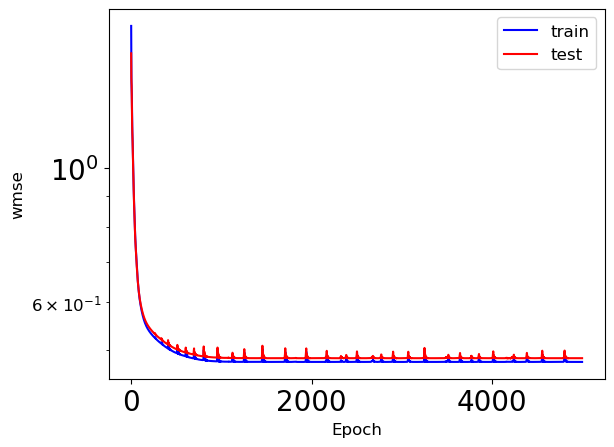

292/292 [==============================] - 0s 732us/step


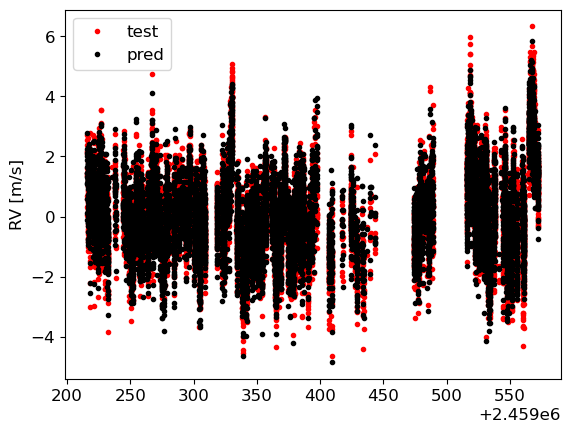

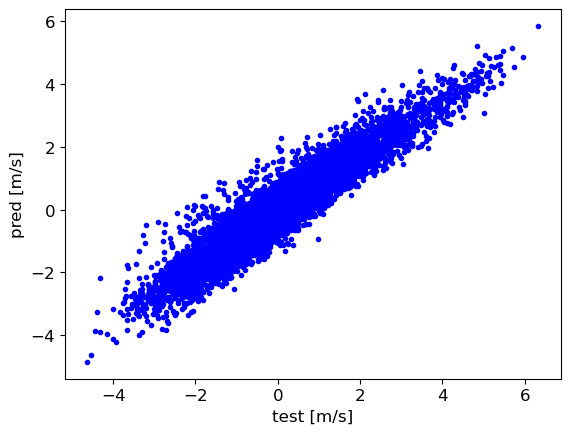

(-0.004371082760571725, 0.48181972262367206)


In [41]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv - np.mean(rv)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(40, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=5000, learning_rate=1e-3)

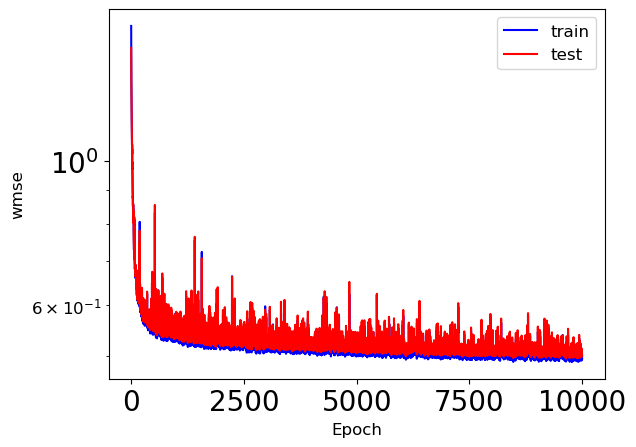

292/292 [==============================] - 0s 737us/step


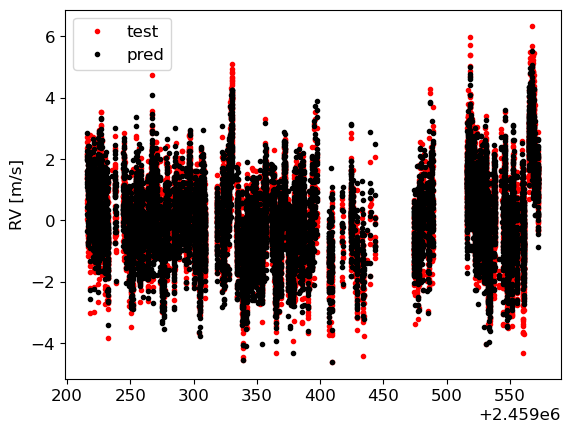

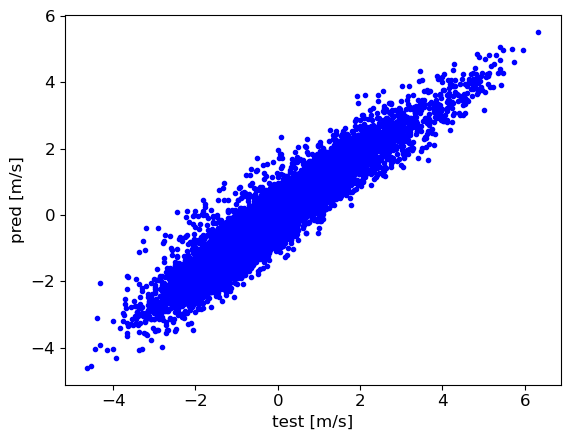

(-0.009645387990142022, 0.49814994559502745)


In [53]:
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(40, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, batch=5, epochs=10000, learning_rate=2e-4)

(31145, 47) (31145,)


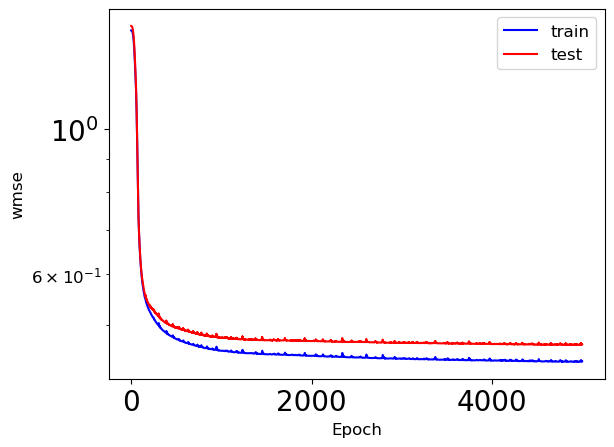

292/292 [==============================] - 0s 863us/step


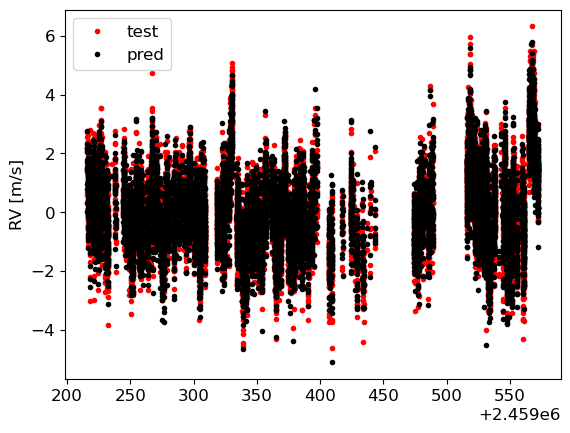

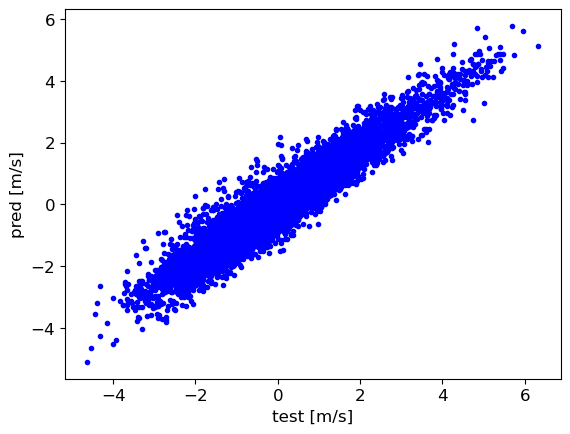

(-0.025420168386842232, 0.4648724372835705)


In [42]:
# X = ΔRV_k.T[:,0:10]
X = ΔRV_k.T
Y = rv - np.mean(rv)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
#                 input_dim = input_dim)) # add bias term!
lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=5000, learning_rate=1e-3)

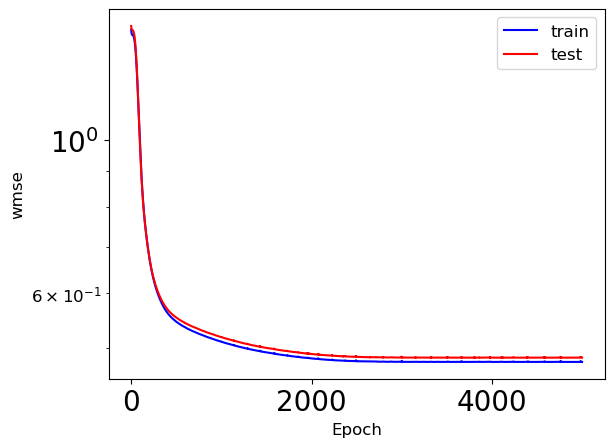

292/292 [==============================] - 0s 744us/step


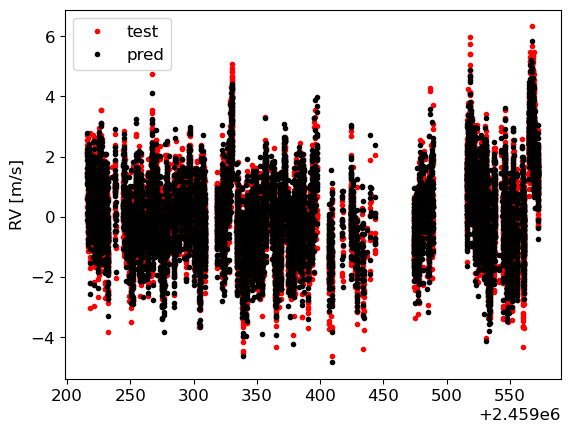

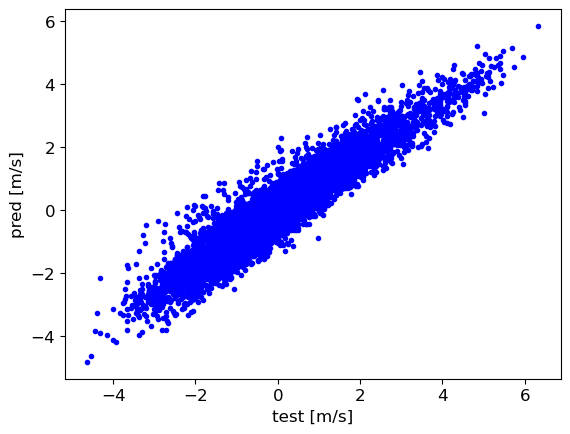

(-0.004386048089467804, 0.4818901211375021)


In [48]:
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(2, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=5000, learning_rate=1e-3)

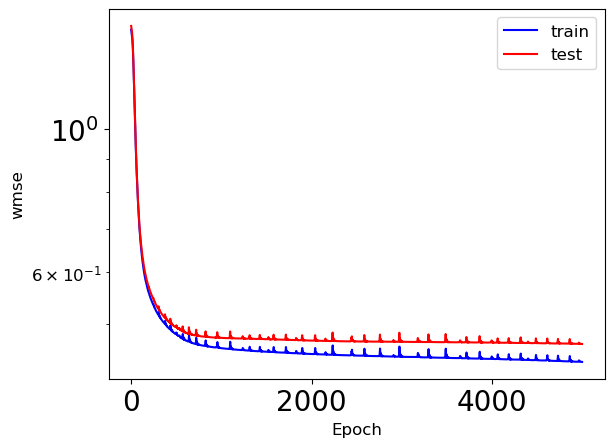

292/292 [==============================] - 0s 792us/step


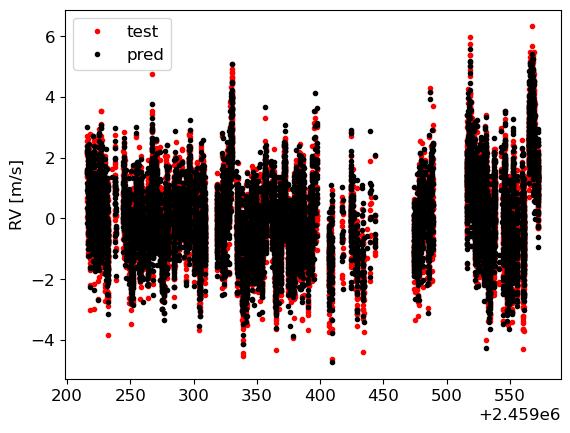

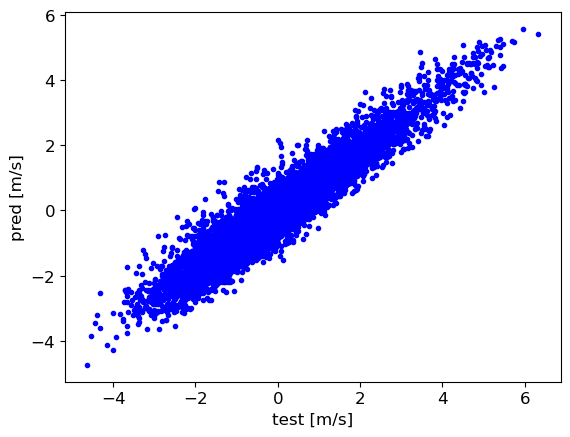

(0.00033297318214457066, 0.46317870957971363)


In [49]:
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias tern!
# lr_model.add(Dropout(0.1))
# lr_model.add(Dense(40, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(4, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model, epochs=5000, learning_rate=1e-3)



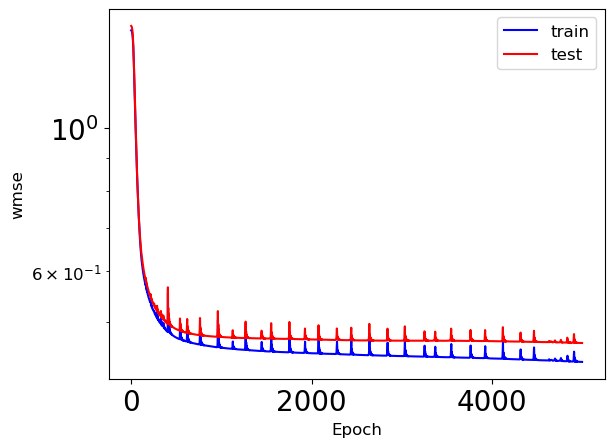

292/292 [==============================] - 0s 837us/step


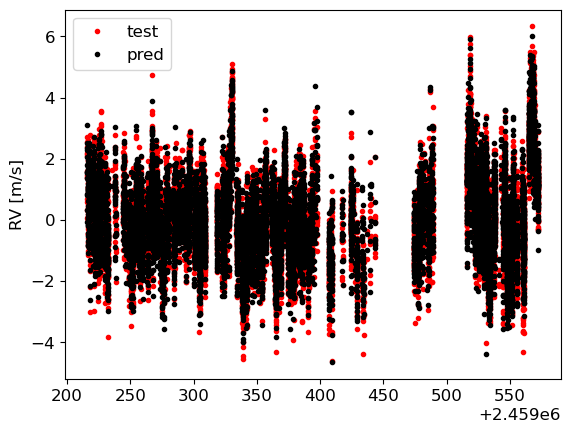

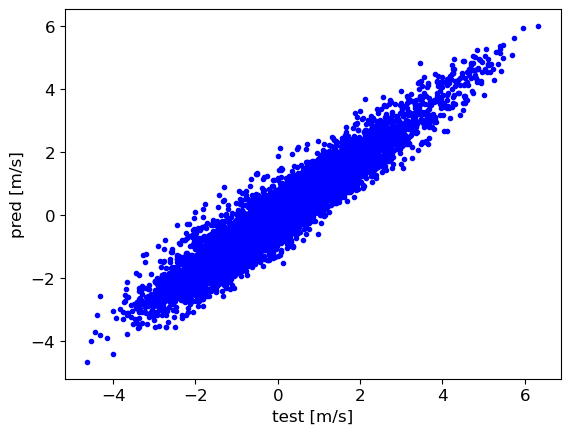

(-0.002425210446769632, 0.461825492016362)


In [50]:
# X = ΔRV_k.T[:,0:30]
# X = ΔRV_k.T
# Y = rv_daily - np.mean(rv_daily)
# print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(16, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model,  epochs=5000, learning_rate=1e-3)

In [ ]:
X = CCF_daily.T
Y = rv_daily - np.mean(rv_daily)
print(X.shape, Y.shape)
###################
# build the model #
###################
input_dim = X.shape[1]
lr_model = Sequential()
# lr_model.add(Dense(32, activation=tf.nn.relu, kernel_initializer='uniform', 
#                 input_dim = input_dim)) 
# lr_model.add(Dense(16, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(40, activation=tf.keras.activations.linear, kernel_initializer='uniform', 
                input_dim = input_dim)) # add bias term!
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.relu))
# lr_model.add(Dense(20, kernel_initializer='uniform', activation=tf.nn.tanh))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.keras.activations.linear))

y_test, y_pred = model_MLP(X, Y, lr_model,  epochs=500, learning_rate=1e-3)